# Домашнее задание 3.1. Визуализация данных в Python
# 🏃‍♂️🤸‍♂️🏋️‍♀️ 


Поздравляем, ты все еще в команде популярной сети фитнес-клубов. Мы ищем точки роста на 2021 год и хотим исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.

В следующих 6 заданиях ты построишь графики — они помогут сформулировать новые гипотезы для роста нашей сети фитнес-клубов в следующем году.

Не стесняйся оставлять свои комментарии и заметки с рекомендациями для руководителя относительно данных, которые видишь на графиках. 

Для начала подключись ко всем нужным библиотекам и данным. Проверь, что данные лежат в той же папке, что этот ноутбук.

In [67]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [68]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

#сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

In [16]:
workouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104693 entries, 0 to 104692
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   workout_id             104693 non-null  int64         
 1   cost                   100012 non-null  float64       
 2   start_at               104693 non-null  datetime64[ns]
 3   status                 104693 non-null  object        
 4   workout_schedule_type  104693 non-null  object        
 5   client_id              104693 non-null  int64         
 6   client_status          100362 non-null  object        
 7   workout_type           104693 non-null  object        
 8   trainer_department     104676 non-null  object        
 9   trainer_id             104693 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 8.0+ MB


## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь.**


In [69]:
trainings_by_day = workouts.groupby(workouts['start_at'].dt.date)['workout_id'].count()

trainings_by_day = pd.DataFrame(trainings_by_day)
trainings_by_day

,workout_id
start_at,
2020-01-01,1
2020-01-02,4
2020-01-03,5
2020-01-04,5
2020-01-05,9
...,...
2020-12-04,365
2020-12-05,292
2020-12-06,250


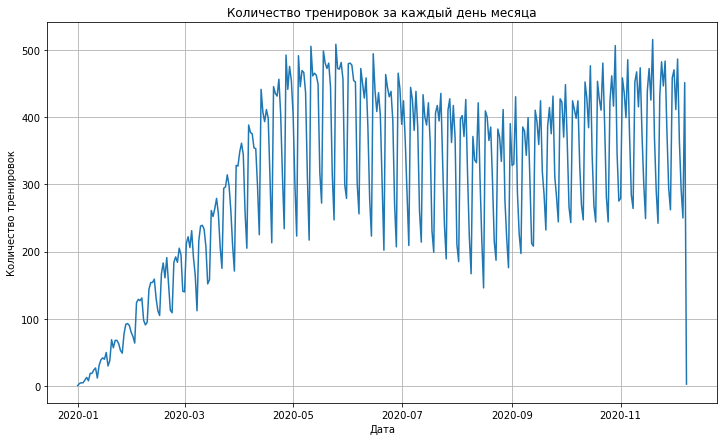

In [70]:
plt.figure(figsize=(12,7))

plt.title('Количество тренировок за каждый день месяца')

plt.xlabel('Дата')

plt.ylabel('Количество тренировок')

plt.grid()

plt.plot(trainings_by_day)

plt.show()

## Задание 2

В ноябре постоянные тренеры жаловались на перегрузку. При этом,  в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. 

**Построй гистограмму, которая покажет, как были распределены тренировки за ноябрь по тренерам, которые уже работали в нашей компании до 1 ноября и сделай отдельный график по каждому департаменту (всего их 7).**


*Весь код можно написать в одной ячейке.*

**Подготовим данные**


In [71]:
#выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

#множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [72]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [73]:
#кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем серию в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


In [74]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments


{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

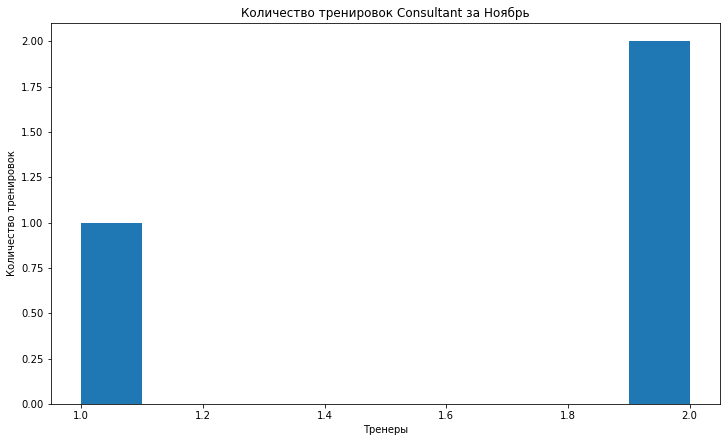

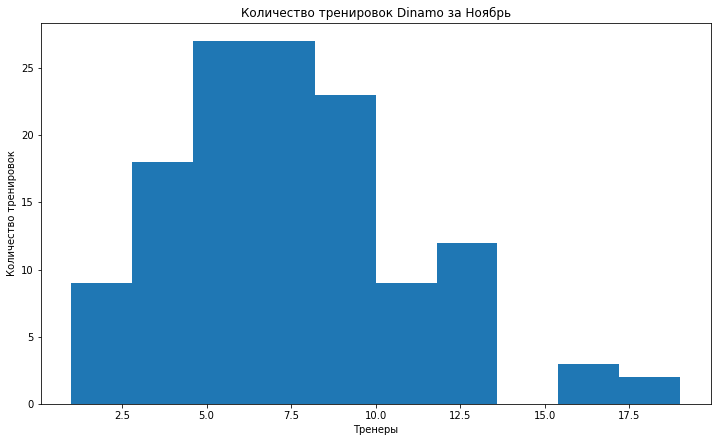

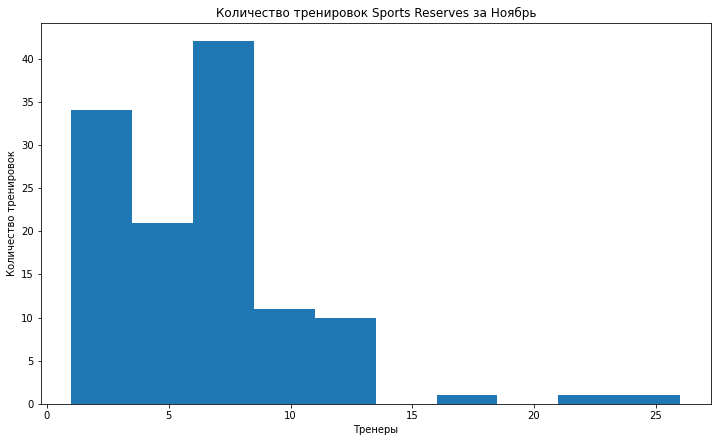

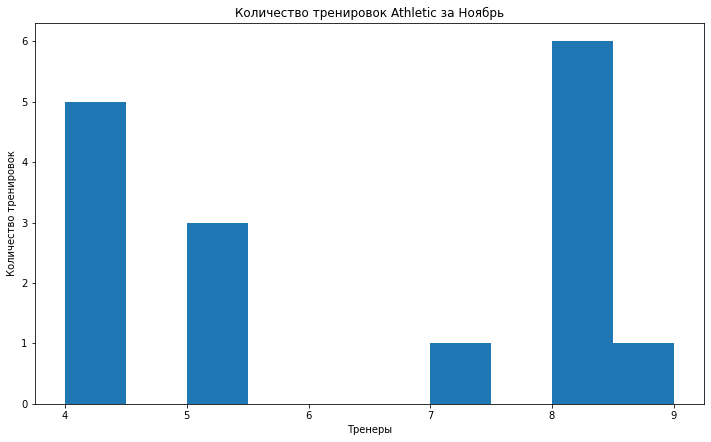

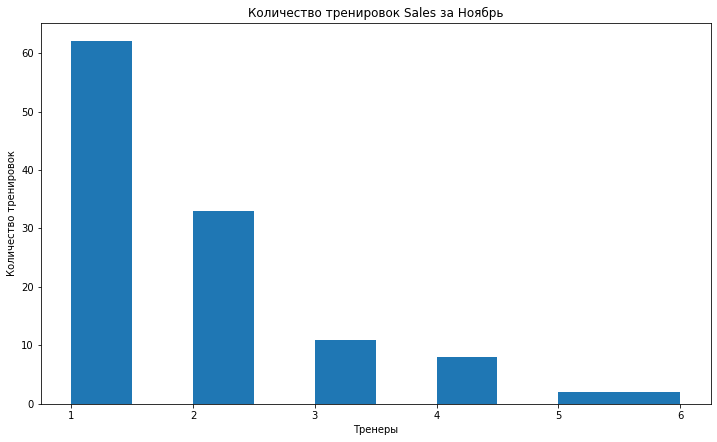

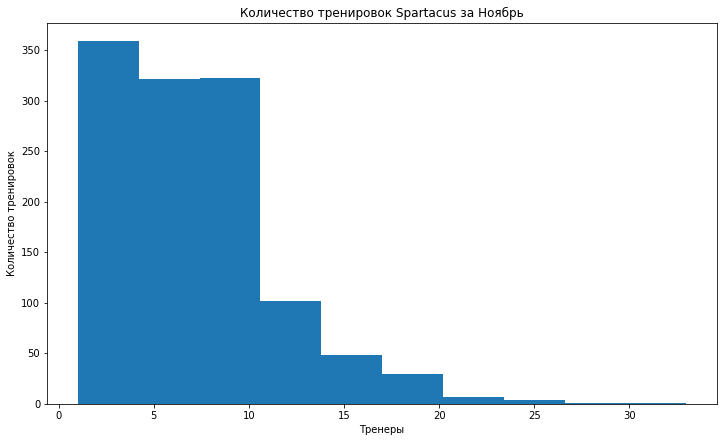

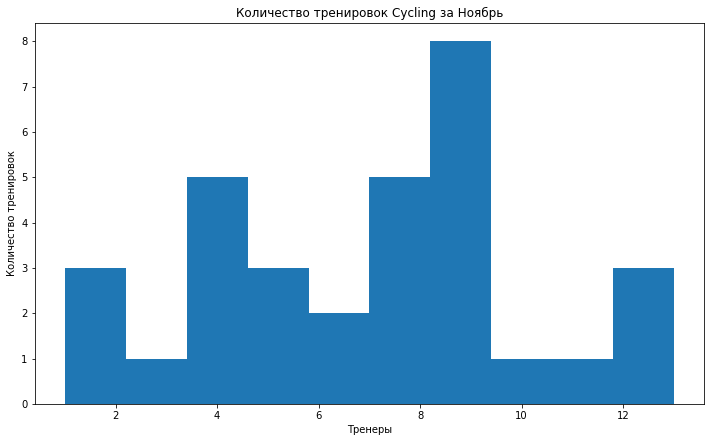

In [75]:
# Цикл с гистограммами по тренерам для каждого департамента

for trainer_department in departments:
    to_plot = workouts_by_trainer.loc[workouts_by_trainer['trainer_department'] == trainer_department]['workouts']
#to_plot.head()
    plt.figure(figsize = (12,7))
    plt.title('Количество тренировок {} за Ноябрь'.format(trainer_department))
    plt.xlabel('Тренеры')
    plt.ylabel('Количество тренировок')
    plt.hist(to_plot)
    plt.show()

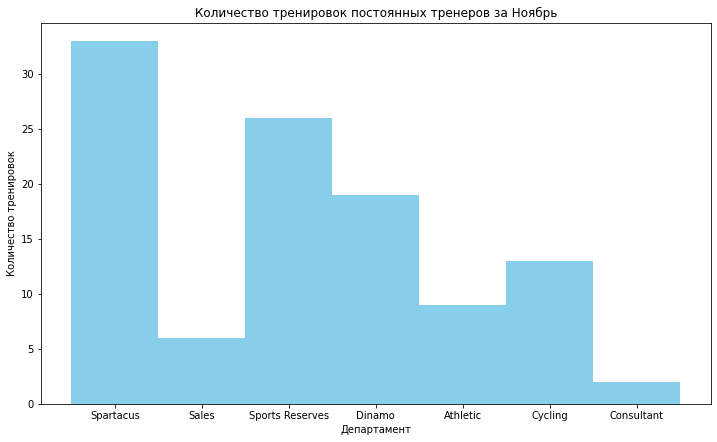

In [76]:
#Гистограмма по департаментам

plt.figure(figsize = (12,7))
plt.title('Количество тренировок постоянных тренеров за Ноябрь')
plt.xlabel('Департамент')
plt.ylabel('Количество тренировок')
plt.bar(workouts_by_trainer['trainer_department'],
        workouts_by_trainer['workouts'],
        width = 1,
        color = 'skyblue'
        )
plt.show()

## Задание 3

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренеровок по сравнению с остальными, и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**


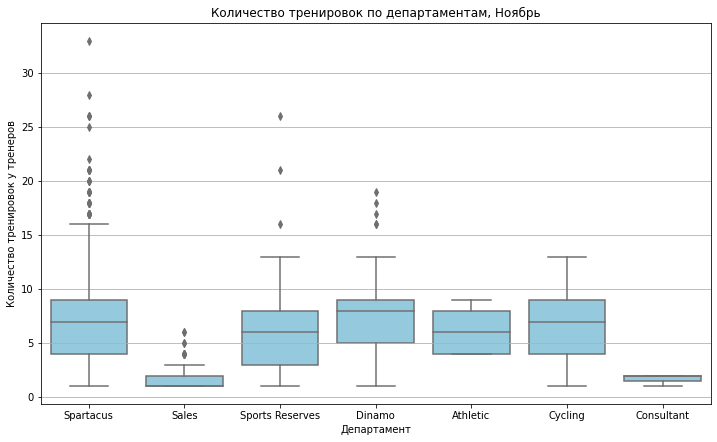

In [77]:
all_workouts = workouts_by_trainer['workouts'].sum()



plt.figure(figsize = (12,7))
plt.grid()
sns.boxplot(x = 'trainer_department',
            y = 'workouts',
            data = workouts_by_trainer,
            color = 'skyblue')

plt.title('Количество тренировок по департаментам, Ноябрь')
plt.xlabel('Департамент')
plt.ylabel('Количество тренировок у тренеров')


plt.show()





Большое кол-во выбросов в департаменте Spartak говорит о неравномерности нагрузки на департамент.
Поэтому следует оптимизировать график тренировок в данном департаменте, чтобы ученики занимались в те дни, когда кол-во тренировок маленькое.

## Задание 4


Логично, что дешевые тренировки пропускаю чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании, оставь комментарий по каждому графику, видишь ли ты какие-то явные зависимости в даннных.**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на `int`
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет корреляцию прогулов к цене**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
    
Подготовим данные:

In [78]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294
...,...,...,...
185,1500,47,0.000000
186,1500,49,0.125000
187,1500,50,0.500000
188,1500,55,0.187500


In [79]:
cor_status_cost = cost_age_data_agg[['cost','status']]
cor_status_cost = pd.DataFrame(cor_status_cost.groupby('cost')['status'].mean().reset_index())
cor_status_cost

,cost,status
0,500,0.256079
1,750,0.231837
2,1000,0.177527
3,1500,0.104612


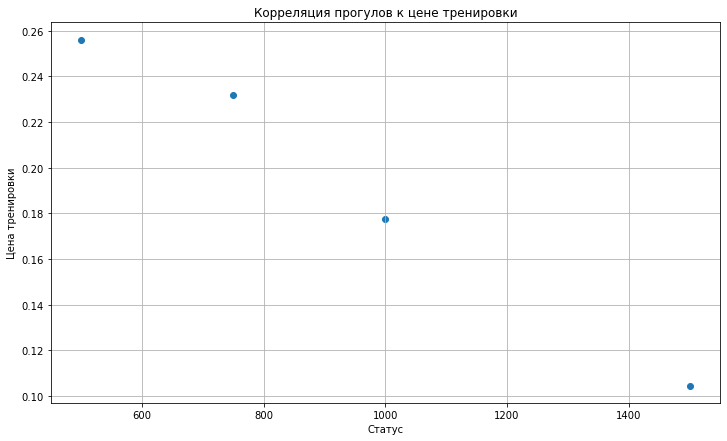

In [56]:
# напиши здесь код


plt.figure(figsize = (12,7))
plt.grid()
plt.title('Корреляция прогулов к цене тренировки')
plt.xlabel('Статус')
plt.ylabel('Цена тренировки')


plt.scatter(cor_status_cost.cost,
            cor_status_cost.status,
            alpha = 1)

plt.show()




3. **Построй скаттерплот, который покажет корреляцию прогулов к возрасту**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без цен, только с возрастом
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике

In [80]:
cor_status_age = cost_age_data_agg[['age','status']]
cor_status_age = pd.DataFrame(cor_status_age.groupby('age')['status'].mean().reset_index())
cor_status_age

,age,status
0,4,0.255814
1,5,0.583333
2,6,0.241935
3,7,0.297032
4,8,0.244135
5,9,0.321185
6,10,0.261739
7,11,0.289497
8,12,0.239117
9,13,0.204689


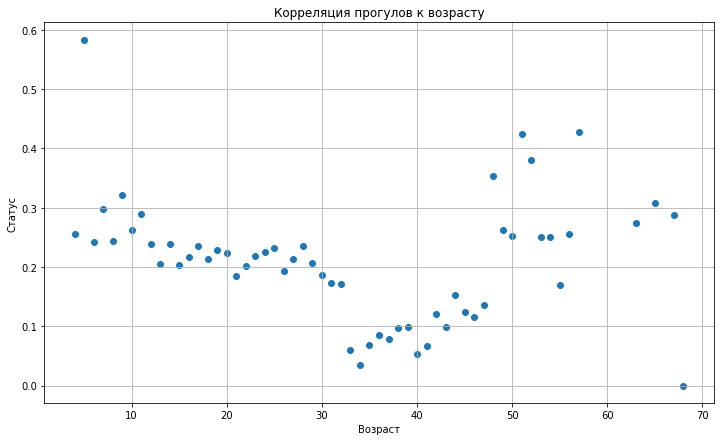

In [81]:
plt.figure(figsize = (12,7))
plt.grid()
plt.title('Корреляция прогулов к возрасту')
plt.xlabel('Возраст')
plt.ylabel('Статус')


plt.scatter(cor_status_age.age,
            cor_status_age.status,
            alpha = 1)

plt.show()

4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту и к цене одновременно**
    - создай словарь цветов цен в переменной `price_color`. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - аргумент  с - цвета для разных цен
          

In [82]:
price_color = {500:'g',
               750:'b',
               1000:'r',
               1500:'k'
}

In [83]:
costs = set(cost_age_data_agg['cost'])
costs


{500, 750, 1000, 1500}

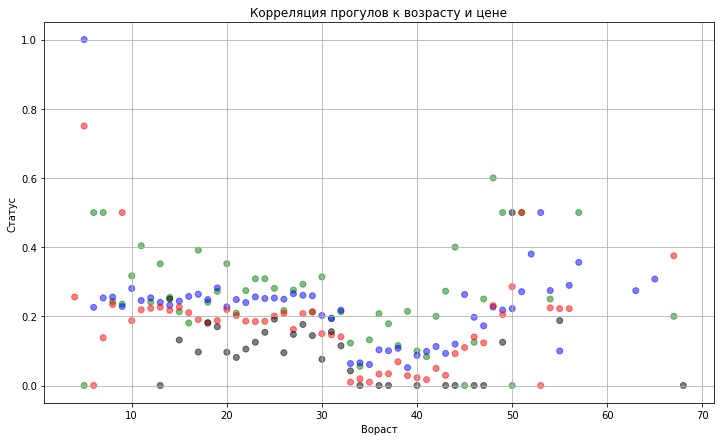

In [84]:
plt.figure(figsize = (12,7))
plt.grid()

plt.title('Корреляция прогулов к возрасту и цене')
plt.xlabel('Вораст')
plt.ylabel('Статус')

scatter = plt.scatter(cost_age_data_agg.age,
            cost_age_data_agg.status,
            c = cost_age_data_agg['cost'].map(price_color),
            alpha = 0.5)
plt.show()



## Задание 5

**Сделай heatmаp для кейса из задания 5.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй хитмап. Используй любые аргументы, но обязательно вот эти:
    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике.

In [85]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [86]:
#кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg

,cost,age_bin,status
0,500,0-20,0.286578
1,500,21-25,0.283505
2,500,26-30,0.255597
3,500,31-35,0.165217
4,500,36-40,0.175573
5,500,41-45,0.191489
6,500,46-50,0.285714
7,500,50+,0.307692
8,750,0-20,0.249445
9,750,21-25,0.250124


In [87]:
heat_cost_age_data = cost_age_data_agg.pivot(index = 'age_bin',
                                           columns = 'cost',
                                           values = 'status')
heat_cost_age_data #Наша сводная таблица

cost,500,750,1000,1500
age_bin,,,,
0-20,0.286578,0.249445,0.206955,0.133663
21-25,0.283505,0.250124,0.190771,0.158784
26-30,0.255597,0.249445,0.191932,0.124706
31-35,0.165217,0.128114,0.069580,0.100313
36-40,0.175573,0.097115,0.035191,0.000000
41-45,0.191489,0.109646,0.067100,0.000000
46-50,0.285714,0.198748,0.171171,0.097561
50+,0.307692,0.296992,0.239130,0.176471


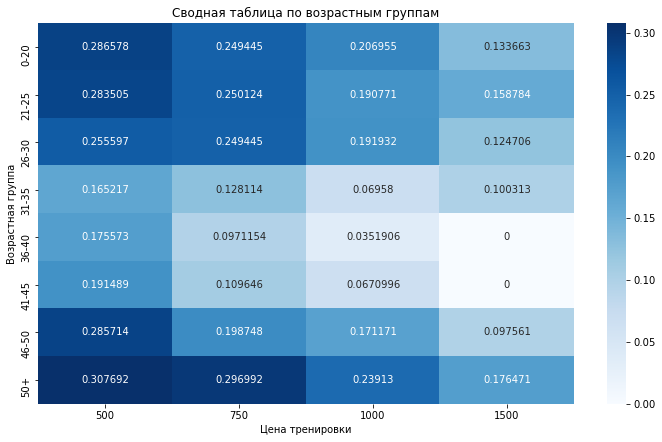

In [88]:
plt.figure(figsize = (12,7))

sns.heatmap(heat_cost_age_data,
           annot = True,
           cmap = "Blues",
           fmt = 'g')

plt.title("Сводная таблица по возрастным группам")
plt.ylabel("Возрастная группа")
plt.xlabel("Цена тренировки")

plt.show()

#P.S. Не хочет размечать наши оси так 

На графике мы видим, что цена тренировки влияет на вероятность пропуска занятий. 
Размер потраченной суммы говорит о мотивированности клиента.
В свою очередь возрастные группы, относящиеся к наиболее осознанным, так же подтверждают данные выводы.

## EXTRA

Если остались силы, есть дополнительное задание, делать его можно по желанию. Основная его сложность в том, что нужно построить bar chart, а на занятии функцию этого графика мы не проходили. Но найти ее самостоятельно будет совсем не сложно. 

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалаи:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью `dt.weekday`
    
    - добавили столбец с названием дня недели с помощью `dt.day_name()`
    

2. Cгруппируй данные колонки week_day_num по workouts с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - задай цвет на графике
    

4. Добавь горизонтальную линию со средним количеством тренировок в день.
5. Оставь комментарий, что ты видишь на графике. 

**Подготовим данные**

In [89]:
trainings_by_week = workouts.groupby(workouts['start_at'].dt.day_name())['workout_id'].count()
#Заново сгруппировал количество тренировок сразу по дням недели с помощью dt.day_name()
trainings_by_week = pd.DataFrame(trainings_by_week) #Превратил в датафрейм
trainings_by_week

,workout_id
start_at,
Friday,14912
Monday,17953
Saturday,11170
Sunday,9317
Thursday,17897
Tuesday,17134
Wednesday,16310


In [90]:
trainings_by_dweek_frame = trainings_by_week.reset_index() # ресетнул индекс
trainings_by_dweek_frame.columns=['workouts_date', 'workouts'] # переименовал столбцы
trainings_by_dweek_frame.index +=1
# Плюсанул единицу к индексу, так как он по совместительству еще и наш 'week_day_num'
trainings_by_dweek_frame.index.names = ['week_day_num'] #Переименовал его в 'week_day_num'
trainings_by_dweek_frame.reset_index() # и превратил его в столбец ресетнув снова индекс

,week_day_num,workouts_date,workouts
0,1,Friday,14912
1,2,Monday,17953
2,3,Saturday,11170
3,4,Sunday,9317
4,5,Thursday,17897
5,6,Tuesday,17134
6,7,Wednesday,16310


In [91]:
week_day_grouping = trainings_by_dweek_frame.groupby('week_day_num')['workouts'].mean()

week_day_grouping

week_day_num
1    14912
2    17953
3    11170
4     9317
5    17897
6    17134
7    16310
Name: workouts, dtype: int64

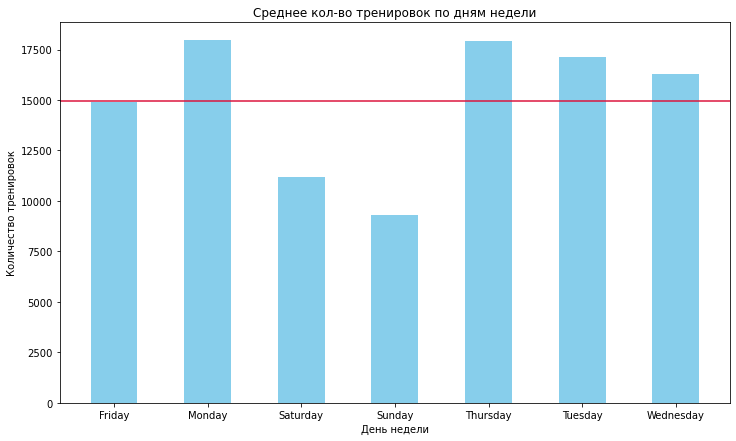

In [96]:
plt.figure(figsize = (12,7)) #Построил график

plt.bar(trainings_by_dweek_frame['workouts_date'],
       trainings_by_dweek_frame['workouts'],
       width = 0.5,
       color = 'skyblue')
plt.axhline(trainings_by_dweek_frame.workouts.mean(),
           color = 'crimson')
plt.title('Среднее кол-во тренировок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество тренировок')
plt.show() # Получил наш bar chart

# 🎉🎉🎉 Поздравляем, ты великолепен! 